# 데이터 수집 및 전처리


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/인공지능응용/data/train.csv",encoding='utf-8')

In [3]:
!pip install --upgrade imbalanced-learn
!pip install --upgrade scikit-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score,roc_curve
import time

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# 최대 열 출력 수를 늘림
pd.set_option('display.max_columns', None)

df.filter(like='V').describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000
mean,-0.169838,0.040771,0.493037,0.117429,-0.176102,0.058235,-0.080669,0.032227,0.018887,-0.029860,0.192931,-0.097563,0.064948,0.082161,0.133121,-0.007633,0.041929,-0.050953,-0.019295,0.030951,-0.028287,-0.083744,-0.022450,0.009008,0.092269,0.012603,0.002093,0.002445
std,1.850529,1.610874,1.383241,1.371910,1.338609,1.295123,1.208518,1.227630,1.152284,1.096870,1.047129,1.143030,1.048403,0.978313,0.950533,0.882970,0.912961,0.834891,0.812640,0.725834,0.743713,0.667318,0.584508,0.598760,0.465505,0.490660,0.391951,0.307315
min,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.049895,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-22.838548,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896
25%,-0.986667,-0.539174,-0.064747,-0.743475,-0.828769,-0.691129,-0.586314,-0.162638,-0.660083,-0.519237,-0.565404,-0.509487,-0.626833,-0.336870,-0.449761,-0.470979,-0.417753,-0.524206,-0.497651,-0.183583,-0.230722,-0.546777,-0.170294,-0.332459,-0.195933,-0.330346,-0.065125,-0.027054
50%,-0.183560,0.109679,0.623352,0.124307,-0.226228,-0.202634,-0.031932,0.056664,-0.078963,-0.111448,0.119980,0.110904,0.031907,0.093021,0.244211,0.063845,-0.018106,-0.052349,-0.022296,-0.036160,-0.054462,-0.066786,-0.036211,0.059474,0.135662,-0.058966,0.008693,0.021152
75%,1.184446,0.804221,1.297352,0.937632,0.374445,0.449200,0.462616,0.350995,0.641358,0.408345,0.999152,0.617389,0.743255,0.528002,0.828286,0.527882,0.435482,0.432105,0.467626,0.155777,0.128337,0.363165,0.098707,0.415860,0.399458,0.272938,0.089727,0.078302
max,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808


In [5]:
# 중복 데이터 확인
df.duplicated().sum() # 1081개 전처리 시 지우기

0

# 데이터 증강 및 모델링

### amount에 스케일링 진행

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate

numeric_features = ['Amount']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'
)

# 스케일링 -> SMOTE 오버샘플링 -> LGBM 모델
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('classifier', RandomForestClassifier())
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# train data와 test data 분리 : x는 특성 변수, y는 타겟변수
x = df.drop(columns=['Class','id'])
y = df['Class']
scoring = ['precision', 'recall', 'f1', 'average_precision']
scores = cross_validate(pipeline, x, y, cv=skf, scoring=scoring)


print("Cross-Validation Results:")
for metric in scoring:
    print(f"{metric.capitalize()} Scores:", scores[f'test_{metric}'])
    print(f"Mean {metric.capitalize()}:", scores[f'test_{metric}'].mean())

Cross-Validation Results:
Precision Scores: [0.90909091 0.88888889 0.90769231 0.85135135 0.89552239]
Mean Precision: 0.8905091690166318
Recall Scores: [0.83333333 0.88888889 0.81944444 0.875      0.83333333]
Mean Recall: 0.85
F1 Scores: [0.86956522 0.88888889 0.86131387 0.8630137  0.86330935]
Mean F1: 0.869218205208291
Average_precision Scores: [0.85890486 0.92352922 0.80365324 0.89583635 0.8646315 ]
Mean Average_precision: 0.8693110340437291


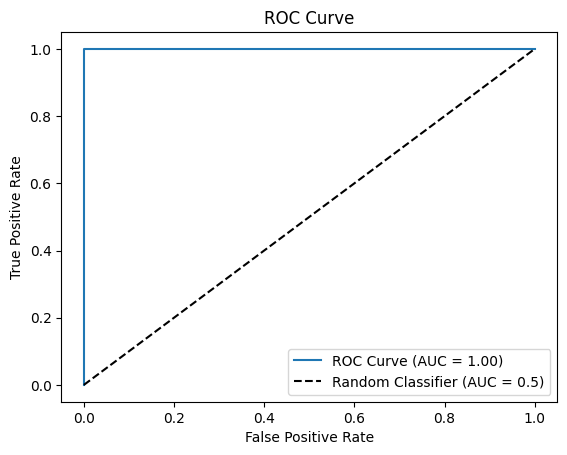

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split

# 전체 데이터로 최종 모델 학습
pipeline.fit(x, y)

# 테스트 데이터 분할 (예시용으로 전체 데이터를 훈련 후 테스트 세트로 분할하여 평가)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# 최종 모델로 예측 확률 계산
y_prob = pipeline.predict_proba(X_test)[:, 1]

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# ROC Curve 그리기
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

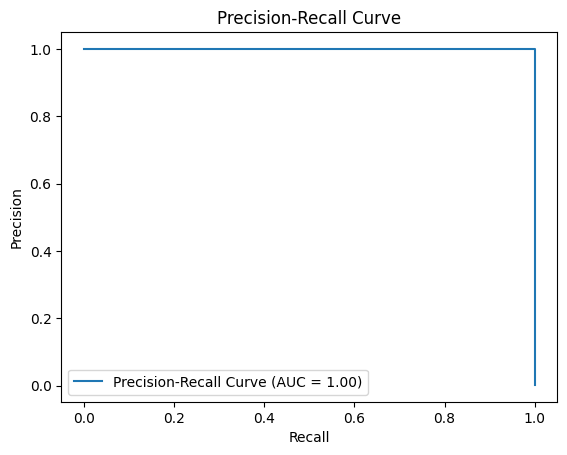

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_prob = pipeline.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


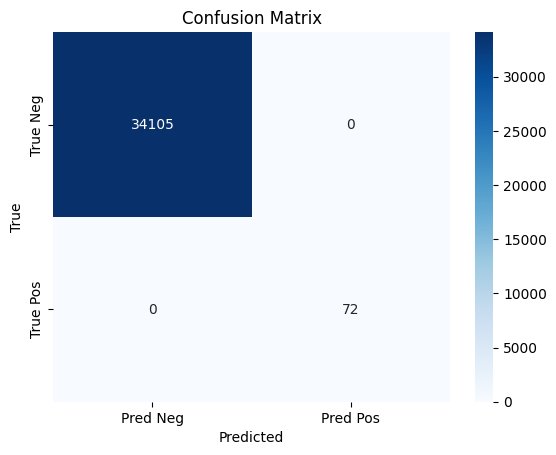

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Neg', 'Pred Pos'], yticklabels=['True Neg', 'True Pos'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#### 안씀

In [ ]:
# 중복 데이터 제거
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split

# train data와 test data 분리 : x는 특성 변수, y는 타겟변수
x = df.drop(columns=['Class'])
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=99999)
# train data와 validation data 분리
x_train, x_val, y_train, y_val=train_test_split(x_train, y_train, test_size=0.3, shuffle=True, random_state=99999)

In [ ]:
from imblearn.over_sampling import SMOTE

# 학습 데이터에 SMOTE 적용 (오버샘플링)
smote = SMOTE()
x_train_SMOTE, y_train_SMOTE = smote.fit_resample(x_train, y_train)

# 결과 확인
print("Original y_train distribution:")
print(y_train.value_counts())
print("\nSMOTE-applied y_train distribution:")
print(y_train_SMOTE.value_counts())

Original y_train distribution:
Class
0    138787
1       238
Name: count, dtype: int64

SMOTE-applied y_train distribution:
Class
0    138787
1    138787
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()

In [ ]:
RF_model.fit(x_train_SMOTE, y_train_SMOTE)

RandomForestClassifier()

In [ ]:
# 예측
rf_perdicted_value = RF_model.predict(x_val)

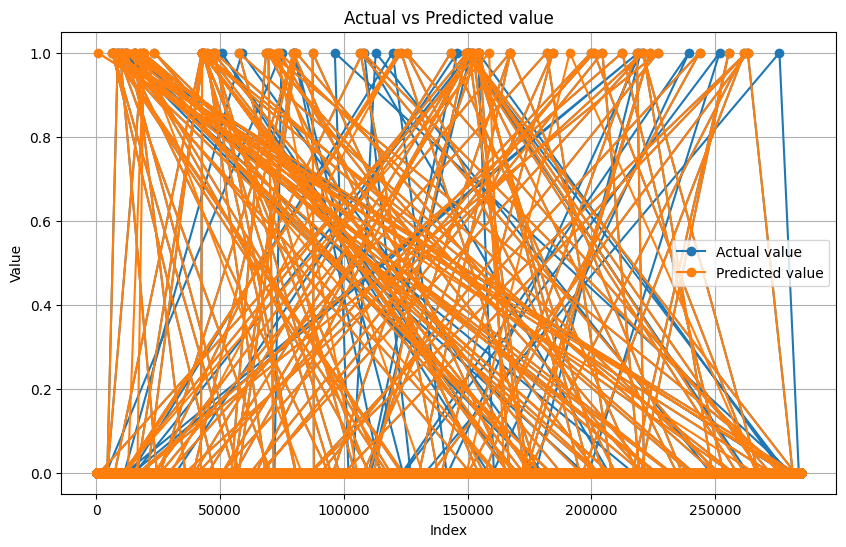

In [ ]:
# 실제 값과 예측 값 비교를 위한 데이터프레임 생성
comparison_df = pd.DataFrame({'Actual value': y_val, 'Predicted value': rf_perdicted_value})

# 실제 값과 예측 값 비교 그래프
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(comparison_df.index, comparison_df['Actual value'], marker='o', linestyle='-', label='Actual value')
plt.plot(comparison_df.index, comparison_df['Predicted value'], marker='o', linestyle='-', label='Predicted value')
plt.title('Actual vs Predicted value')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, average_precision_score
from sklearn import metrics



# 정확도
accuracy = accuracy_score(y_val, rf_perdicted_value)
print("Accuracy:", accuracy)

# 재현율
recall = recall_score(y_val, rf_perdicted_value)
print("Recall:", recall)

# 정밀도
precision = precision_score(y_val, rf_perdicted_value)
print("Precision:", precision)

# F1-score
f1 = f1_score(y_val, rf_perdicted_value)
print("F1 Score:", f1)

# AUPRC
import matplotlib.pyplot as plt
auprc = average_precision_score(y_val, rf_perdicted_value)
print("AUPRC:", auprc)



# 추론 속도
#### 5분


Accuracy: 0.9995972005437793
Recall: 0.7954545454545454
Precision: 0.9210526315789473
F1 Score: 0.8536585365853658
AUPRC: 0.73295760198451


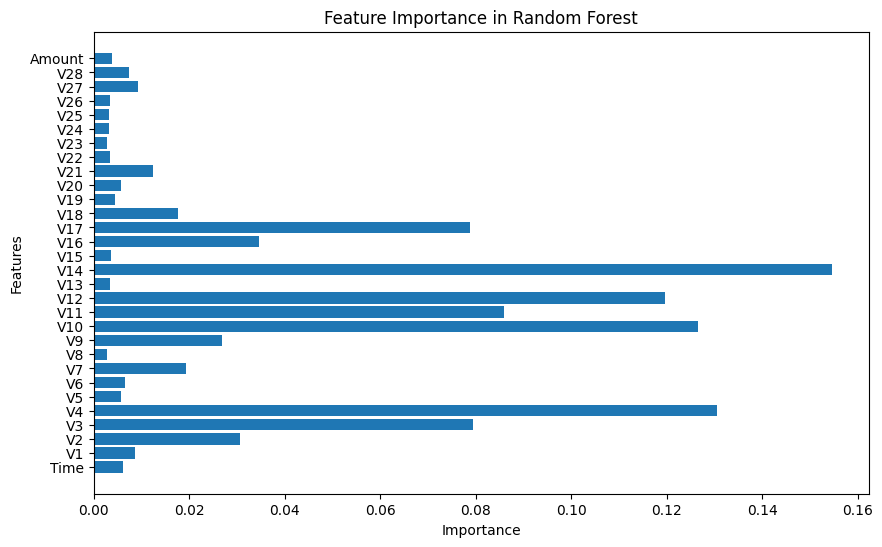

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Feature Importance 추출
feature_importance = RF_model.feature_importances_
features = x_train_SMOTE.columns

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()

In [ ]:
!pip install lime
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1ac99c48151863160b07ecf3b54c249003b14472fbdca0c75e0add3cc80e8c98
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

# LIME 설명자 생성
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_SMOTE.values, feature_names=x_train_SMOTE.columns, class_names=['value'], verbose=True, mode='regression')

# 테스트 데이터의 첫 번째 샘플에 대한 설명 생성
i = 0
exp = explainer.explain_instance(x_val.values[i], RF_model.predict, num_features=10)

# 설명 시각화
exp.show_in_notebook(show_table=True)

Intercept 0.2802590925090541
Prediction_local [-0.34002062]
Right: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


100%|===================| 119144/119166 [81:47<00:00]       

TypeError: only integer scalar arrays can be converted to a scalar index

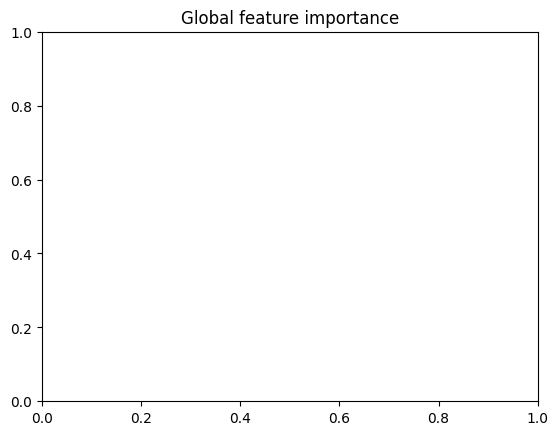

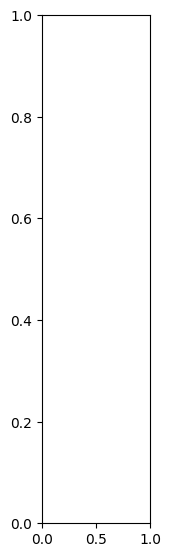

In [ ]:
import shap
# SHAP 적용
#explainer = shap.Explainer(best_RF_model, x_train)
explainer = shap.Explainer(RF_model, x_train_SMOTE)
shap_values = explainer(x_val)

plt.title('Global feature importance')
plt.rc('font', family='NanumBarunGothic')
shap.summary_plot(shap_values, x_val)

## amount에 스케일링 진행 안함

In [9]:
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate

# 스케일링 -> SMOTE 오버샘플링 -> LGBM 모델
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('classifier', RandomForestClassifier())
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# train data와 test data 분리 : x는 특성 변수, y는 타겟변수
x = df.drop(columns=['Class','id'])
y = df['Class']
scoring = ['precision', 'recall', 'f1', 'average_precision']
scores = cross_validate(pipeline, x, y, cv=skf, scoring=scoring)


print("Cross-Validation Results:")
for metric in scoring:
    print(f"{metric.capitalize()} Scores:", scores[f'test_{metric}'])
    print(f"Mean {metric.capitalize()}:", scores[f'test_{metric}'].mean())

Cross-Validation Results:
Precision Scores: [0.90909091 0.87671233 0.90625    0.85333333 0.88405797]
Mean Precision: 0.8858889084411719
Recall Scores: [0.83333333 0.88888889 0.80555556 0.88888889 0.84722222]
Mean Recall: 0.8527777777777776
F1 Scores: [0.86956522 0.88275862 0.85294118 0.8707483  0.86524823]
Mean F1: 0.8682523081643261
Average_precision Scores: [0.85809125 0.92452224 0.80544582 0.90136444 0.86898075]
Mean Average_precision: 0.8716808987641238


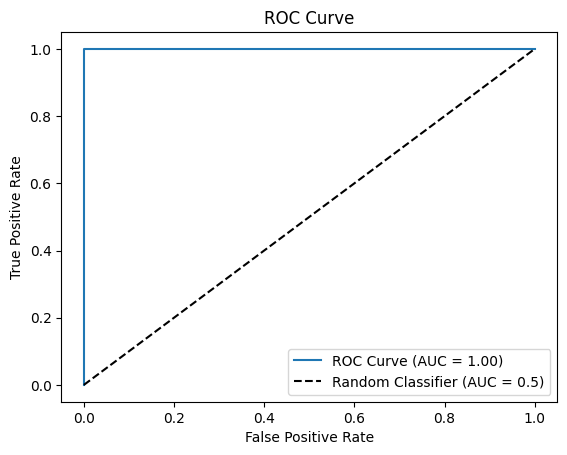

In [10]:
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split

# 전체 데이터로 최종 모델 학습
pipeline.fit(x, y)

# 테스트 데이터 분할 (예시용으로 전체 데이터를 훈련 후 테스트 세트로 분할하여 평가)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# 최종 모델로 예측 확률 계산
y_prob = pipeline.predict_proba(X_test)[:, 1]

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# ROC Curve 그리기
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

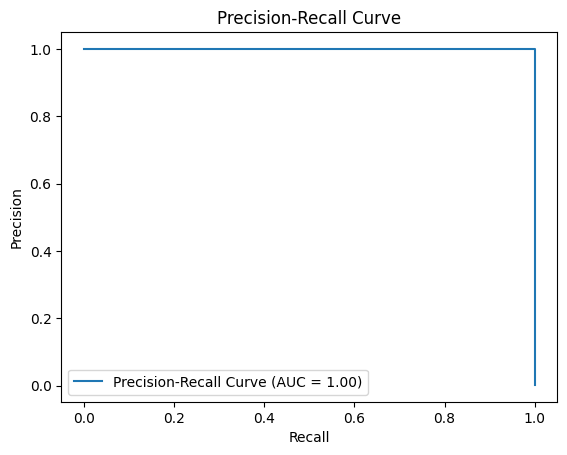

In [11]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_prob = pipeline.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


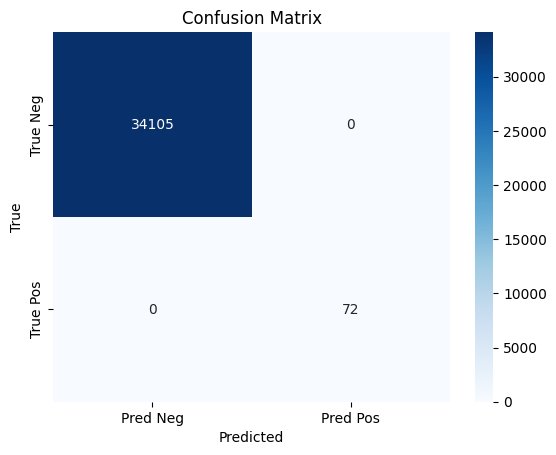

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Neg', 'Pred Pos'], yticklabels=['True Neg', 'True Pos'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
